# **Regression with Videogames Dataset**

**Chapter 2 – End-to-end Machine Learning project**

*Our task is to predict the user score (0-100) of a videogame given a number of its features; this is therefore a supervised learning model. Our analysis would allow game developpers to make informed decisions as to which feature of a game they should be paying attention to; for instance is the platform or the rating very important in predicting accurately the user_score and thus, the popularity of the game?
The performance will be measured by assessing the predictive power of our model using metrics such as the mean squared errors and/or some variants*



Please note that:
- The count of user reviews(e.g., the positive_users columns) : count of written reviews
- The metascore: score given on the famous website metacritic.com (ranges from 0 to 100)

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

We are starting by first taking a quick look at our data:

In [4]:
from sklearn import datasets
import pandas as pd

# load video games dataset
videogames = pd.read_csv('videog.csv')
videogames

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,Modern Combat: Blackout,Switch,Gameloft,Action,No Online Multiplayer,NaN,"Feb 14, 2019",0,5,2,1,0,1,53,57
5695,Fimbul,PS4,Zaxis,Action Adventure,No Online Multiplayer,NaN,"Feb 28, 2019",0,7,2,1,0,0,52,18
5696,Generation Zero,PC,Avalanche Studios,Action Adventure,Online Multiplayer,T,"Mar 26, 2019",1,11,6,5,2,6,50,57
5697,Vane,PS4,Friend & Foe,Adventure,No Online Multiplayer,E10+,"Jan 15, 2019",3,26,22,2,2,2,49,55


In [3]:
#pip install pandas-profiling

import numpy as np
import pandas as pd
import pandas_profiling

In [12]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239947 sha256=e536effd11f1ef61e263dc4c5fb761dda9f3a94f96d145bbd8e76facca2d0465
  Stored in directory: /private/var/folders/60/93g6tzrs32726vc6hwcwyg840000gn/T/pip-ephem-wheel-cache-dchlz4fj/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Pose probleme 
from pandas_profiling import ProfileReport
df = videogames
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="PPR.html")

In [3]:
#Get name of variables, amount of missing values, data type 
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game              5699 non-null   object
 1   platform          5699 non-null   object
 2   developer         5685 non-null   object
 3   genre             5694 non-null   object
 4   number_players    3059 non-null   object
 5   rating            4433 non-null   object
 6   release_date      5699 non-null   object
 7   positive_critics  5699 non-null   int64 
 8   neutral_critics   5699 non-null   int64 
 9   negative_critics  5699 non-null   int64 
 10  positive_users    5699 non-null   int64 
 11  neutral_users     5699 non-null   int64 
 12  negative_users    5699 non-null   int64 
 13  metascore         5699 non-null   int64 
 14  user_score        5699 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 668.0+ KB


At first glance, we can see that developper,genre, number of players and rating are variables with seemingly NA values, which we will be taking care of later in our analysis.

In [25]:
videogames.describe() #Gives us summary statistics on numerical variables

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
count,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000
mean,13.351816,7.959467,1.146341,28.752062,8.636603,14.374627,71.857694,67.138621
std,16.202234,7.699535,2.926260,103.688270,24.706790,84.938320,11.214583,13.581873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,3.000000,3.000000,0.000000,2.000000,1.000000,0.000000,66.000000,61.000000
50%,8.000000,6.000000,0.000000,5.000000,2.000000,1.000000,73.000000,70.000000
75%,17.000000,10.000000,1.000000,17.000000,6.000000,5.000000,80.000000,76.000000
max,118.000000,65.000000,51.000000,2762.000000,506.000000,2998.000000,97.000000,94.000000


Saving figure attribute_histogram_plots


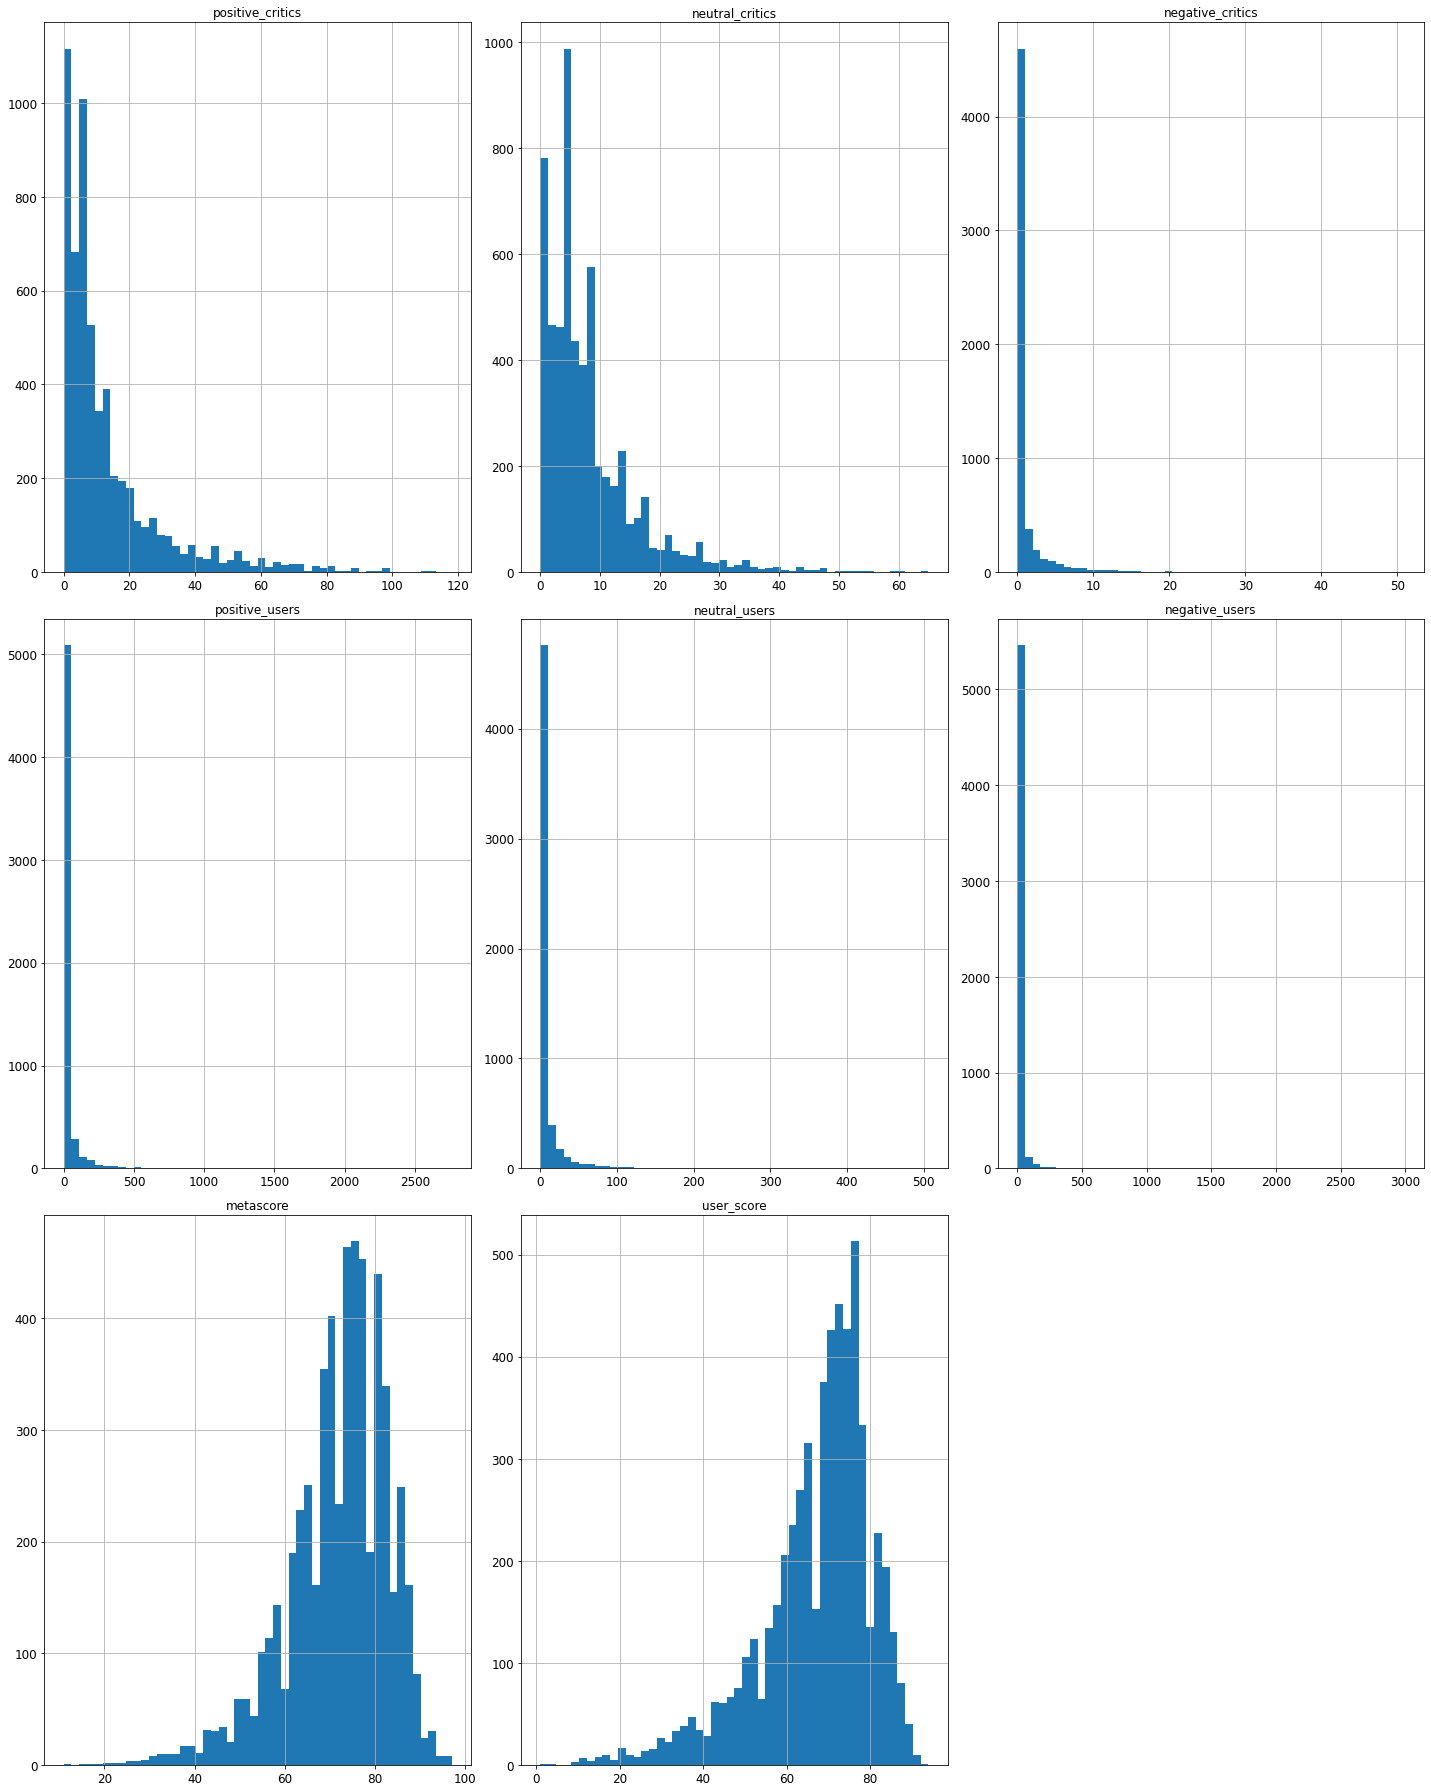

In [26]:
#Visualize the data and assess the distributions
%matplotlib inline
import matplotlib.pyplot as plt
videogames.hist(bins=50, figsize=(20,25), histtype = 'stepfilled')
save_fig("attribute_histogram_plots")
plt.show()

Comments: 

- The distribution of metascore and user scores is skewed to the left, it also seems like most games have quite good metascores and userscores. 
- There are a very few negative users and critics
- Overall users tend not to give their feebacks. However, they will be more willing to give positive or neutral critics than negative ones
- We might want to consider feature scaling because the attributes are on different scales

Now, we will be creating the test set in order to avoid biases and overfitting and base our further analysis on the training set:

In [5]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(videogames, test_size=0.2, random_state=42)

In [6]:
len(train_set)

4559

In [7]:
len(test_set)

1140

In [8]:
import hashlib #Guess we dont need that 

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [9]:
import hashlib
def test_set_check(identifier, test_ratio, hash=hashlib.md5): #Do we need THIS FCT?
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [10]:
test_set.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
1436,Chariot,XONE,Frima Studio,Action,NaN,E,"Oct 1, 2014",9,5,0,8,3,0,73,76
748,Goodbye Deponia,PC,Daedalic Entertainment,Adventure,No Online Multiplayer,NaN,"Oct 17, 2013",24,9,1,10,4,5,80,78
4596,Darkest Dungeon,Switch,Red Hook Studios,Role-Playing,No Online Multiplayer,T,"Jan 18, 2018",18,0,0,11,2,4,85,81
1448,Lords of the Fallen,PC,"City Interactive, Deck 13",Role-Playing,No Online Multiplayer,M,"Oct 28, 2014",14,22,0,66,32,34,73,69
2543,Temple of Yog,WIIU,CHUDCHUD INDUSTRIES,Action,NaN,E10+,"Dec 16, 2015",0,6,1,1,0,0,54,69


Now,in order to ensure our predictor metascore is representative of the various metascore categories in the whole dataset we will create a new variable called metascore_levels. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased.Most metascores are clustered around 50 to 90. 

<AxesSubplot:>

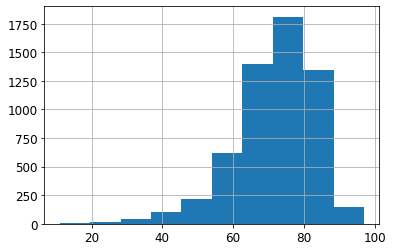

In [11]:
videogames["metascore"].hist()

In [12]:
#Insightful to categorize games by user scores 
videogames["metascore_level"] = pd.cut(videogames["metascore"],
                               bins=[0,50, 60, 70, 80,np.inf],
                               labels=[1,2,3,4,5]) 
#np.inf
videogames["metascore_level"].value_counts()


4    2289
3    1359
5    1245
2     529
1     277
Name: metascore_level, dtype: int64

<AxesSubplot:>

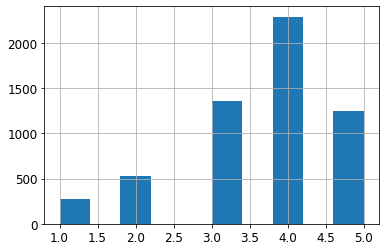

In [13]:
videogames["metascore_level"].hist()

Now, we proceed to stratified sampling: 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(videogames, videogames["metascore_level"]):
    strat_train_set = videogames.loc[train_index]
    strat_test_set = videogames.loc[test_index]

In [15]:
strat_test_set["metascore_level"].value_counts() / len(strat_test_set)

4    0.401754
3    0.238596
5    0.218421
2    0.092982
1    0.048246
Name: metascore_level, dtype: float64

In [16]:
videogames["metascore_level"].value_counts() / len(videogames)

4    0.401649
3    0.238463
5    0.218459
2    0.092823
1    0.048605
Name: metascore_level, dtype: float64

By comparing the metascore_level proportions in the overall dataset and in the test set we can see that using stratified sampling, the test set has metascores_level proportions almost identical to those in the full dataset.The table below summarizes it all.

In [17]:
def videogames_cat_proportions(data): #is it a strategy to choose how to split the data ? 
    return data["metascore_level"].value_counts() / len(data)

train_set, test_set = train_test_split(videogames, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": videogames_cat_proportions(videogames),
    "Stratified": videogames_cat_proportions(strat_test_set),
    "Random": videogames_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [18]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.048605,0.048246,0.048246,-0.739439,-0.739439
2,0.092823,0.092982,0.102632,10.566610,0.171459
3,0.238463,0.238596,0.239474,0.423880,0.056027
4,0.401649,0.401754,0.384211,-4.341818,0.026136
5,0.218459,0.218421,0.225439,3.194744,-0.017544


After this analysis we can now remove metascore_level so the data can be back to its original state:

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("metascore_level", axis=1, inplace=True)

# Discover and visualize the data to gain insights

We made sure to set up the test set in the most appropriate way possible, we can now start our further data exploration with the training set:

In [20]:
videogames = strat_train_set.copy() #create a copy so that I can play with it without harming the training set

<AxesSubplot:xlabel='count', ylabel='genre'>

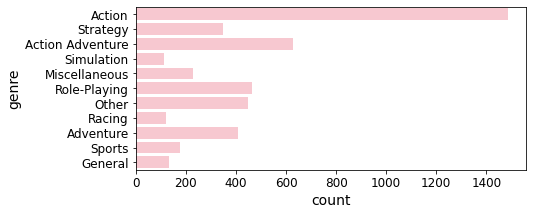

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
top10 = videogames['genre'].value_counts()[:10].index

# At locations where the genre is NOT in the top 10, 
# replace the genre with 'other'
videogames.loc[~videogames['genre'].isin(top10), 'genre'] = 'Other'

#Plot the genres 
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="genre", data=videogames, color="pink")

I releveled the category genre by calling all other categories not in the top 10 in a new category named "Other". We can see that most games are action games.

<AxesSubplot:xlabel='count', ylabel='rating'>

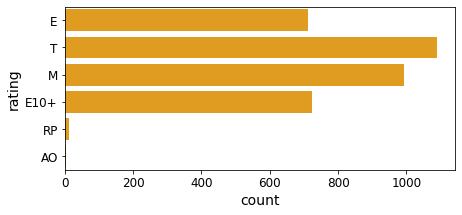

In [22]:
#Plot the ratings
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="rating", data=videogames, color="orange")

We can see that most games are T-rated whiche means that they targetan audience of teenagers.

<AxesSubplot:xlabel='count', ylabel='platform'>

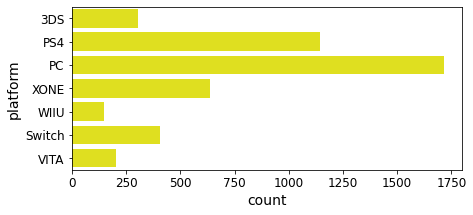

In [23]:
#Want to know the most popular game genres 
#sns.catplot(x="user_score_level", y="user_score", hue = "genre" ,kind="bar", data=videogames,height=8.27, aspect=11.7/8.27)
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="platform", data=videogames, color="yellow")

Most games in our dataset are played on PC.

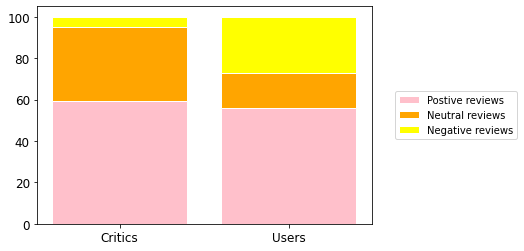

In [24]:
#total percentage of positive/neutral/negative critic scores and user scores
df1 = videogames
df1['total_critics'] = df1['positive_critics'] + df1['neutral_critics'] + df1['negative_critics'] 
df1['total_users'] = df1['positive_users'] + df1['neutral_users'] + df1['negative_users']

#percentage of each review type
percent_positive_reviews = [df1['positive_critics'].sum()/df1['total_critics'].sum()*100, df1['positive_users'].sum()/df1['total_users'].sum()*100]
percent_neutral_reviews = [df1['neutral_critics'].sum()/df1['total_critics'].sum()*100, df1['neutral_users'].sum()/df1['total_users'].sum()*100]
percent_negative_reviews = [df1['negative_critics'].sum()/df1['total_critics'].sum()*100, df1['negative_users'].sum()/df1['total_users'].sum()*100]

#Creation of the chart
x_shape = [0,1]
x_names = ('Critics','Users')
plt.bar(x_shape, percent_positive_reviews, color='pink', edgecolor='white', label = 'Postive reviews')
plt.bar(x_shape, percent_neutral_reviews, bottom=percent_positive_reviews, color='orange', edgecolor='white', label = 'Neutral reviews')
plt.bar(x_shape, percent_negative_reviews, bottom=np.add(percent_positive_reviews, percent_neutral_reviews), color='yellow', edgecolor='white', label = 'Negative reviews')
plt.xticks(x_shape, x_names)
plt.legend(loc='right', bbox_to_anchor=(1.45, 0.5))
plt.show()

We can see that in our dataset most reviews are positive. There are more neutral critics than neutral users and more negative users than negative critics. 

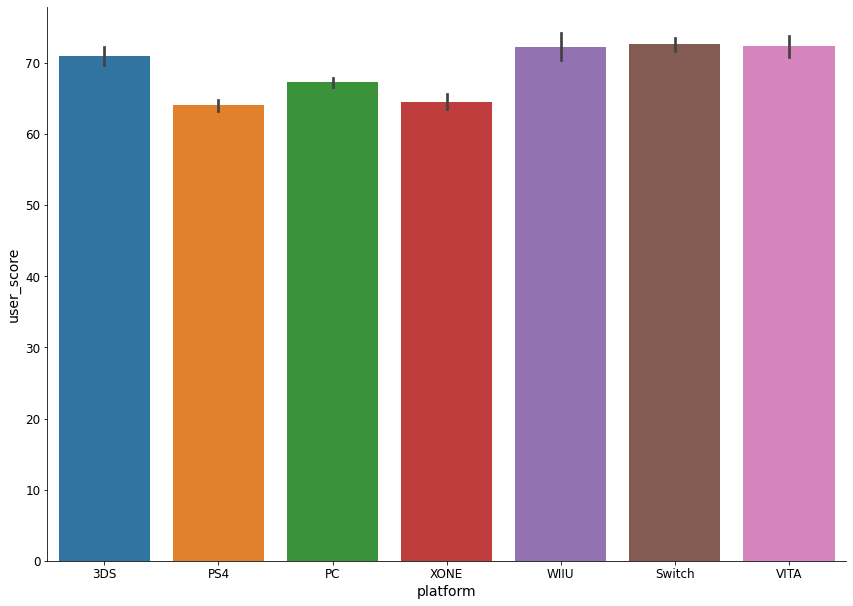

In [25]:
#Preferred Platforms (here we are trying to determine how videogames creators can improve the user score)
#AVG????
sns.catplot(x="platform", y="user_score", kind="bar", data=videogames,height=8.27, aspect=11.7/8.27)

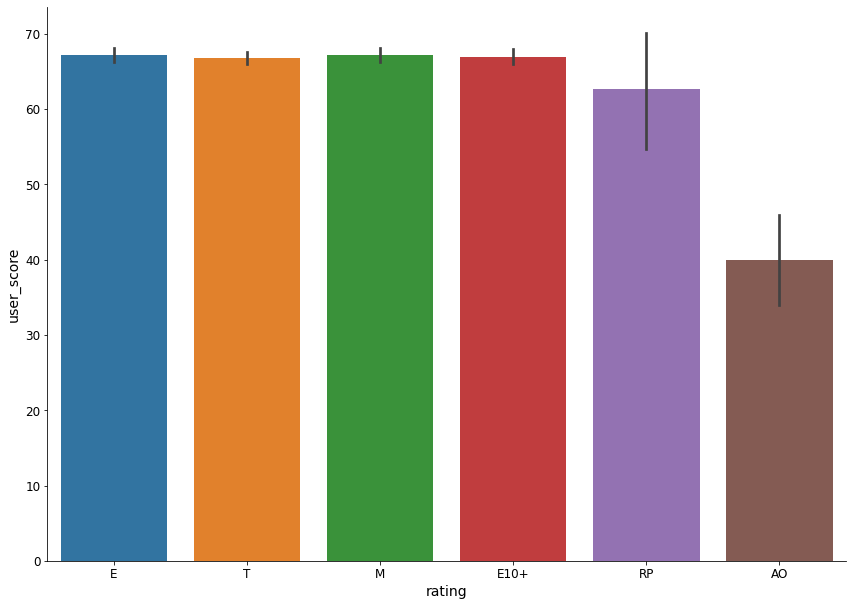

In [26]:
sns.catplot(x="rating", y="user_score", kind="bar", data=videogames,height=8.27, aspect=11.7/8.27)

We are now evaluating the interaction of our numerical variables with the target variable : user_score

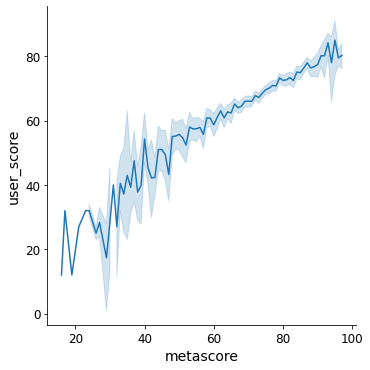

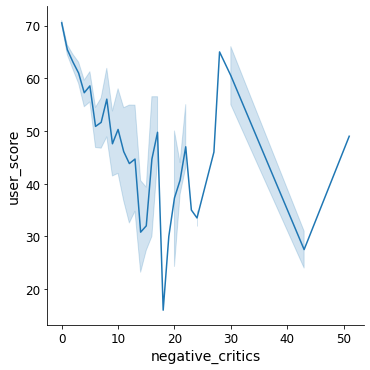

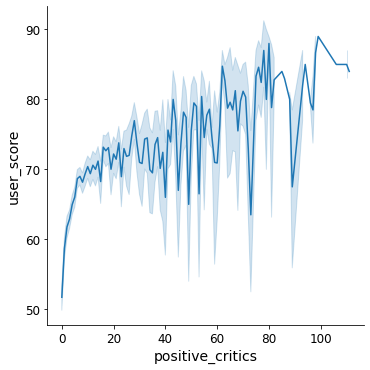

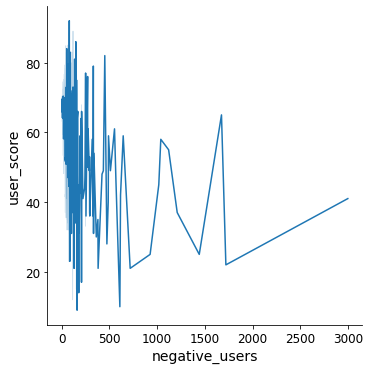

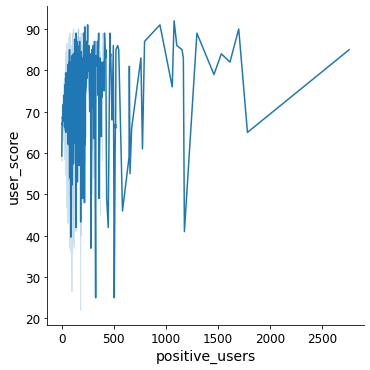

In [27]:
sns.relplot(x="metascore", y="user_score", kind="line", data=videogames);
sns.relplot(x="negative_critics", y="user_score", kind="line", data=videogames);
sns.relplot(x="positive_critics", y="user_score", kind="line", data=videogames);
sns.relplot(x="negative_users", y="user_score", kind="line", data=videogames);
sns.relplot(x="positive_users", y="user_score", kind="line", data=videogames);


From these visualizations we can observe that: 

- The higher the user score the higher the metascore and positive critics.
- Below 25 negative critics, we can see that the higher the number of critics the lower the user score , but up to a certain point (more than 25) the user score increases significantly, which might be explained by the fact that once a certain level of popularity is earned (high user score), the number of negative reviews stops affecting the user score
- for the positive and negative users the visualization is not quite insightful, but further analysis will help us assess their predictive power

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

In [29]:
corr_matrix = videogames.corr()
corr_matrix

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,total_critics,total_users
positive_critics,1.000000,0.019022,-0.208825,0.492232,0.401068,0.179448,0.555423,0.333972,0.867640,0.418413
neutral_critics,0.019022,1.000000,0.268312,0.016638,0.139308,0.101182,-0.328020,-0.158462,0.490294,0.074763
negative_critics,-0.208825,0.268312,1.000000,-0.026341,0.022920,0.067696,-0.655972,-0.385940,0.089207,0.018739
positive_users,0.492232,0.016638,-0.026341,1.000000,0.742407,0.473914,0.236912,0.128067,0.442458,0.889199
neutral_users,0.401068,0.139308,0.022920,0.742407,1.000000,0.686537,0.164667,-0.021576,0.421737,0.874351
negative_users,0.179448,0.101182,0.067696,0.473914,0.686537,1.000000,0.051673,-0.182704,0.214617,0.818442
metascore,0.555423,-0.328020,-0.655972,0.236912,0.164667,0.051673,1.000000,0.538901,0.249696,0.181733
user_score,0.333972,-0.158462,-0.385940,0.128067,-0.021576,-0.182704,0.538901,1.000000,0.168186,-0.012383
total_critics,0.867640,0.490294,0.089207,0.442458,0.421737,0.214617,0.249696,0.168186,1.000000,0.408779
total_users,0.418413,0.074763,0.018739,0.889199,0.874351,0.818442,0.181733,-0.012383,0.408779,1.000000


<AxesSubplot:>

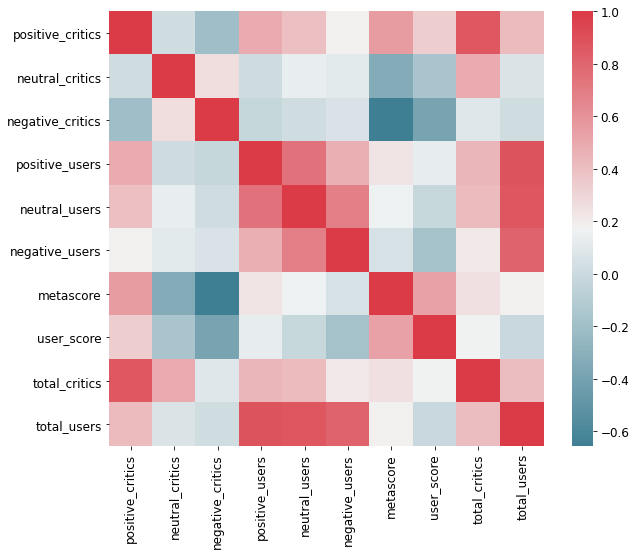

In [30]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = videogames.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [31]:
corr_matrix["user_score"].sort_values(ascending=False)

user_score          1.000000
metascore           0.538901
positive_critics    0.333972
total_critics       0.168186
positive_users      0.128067
total_users        -0.012383
neutral_users      -0.021576
neutral_critics    -0.158462
negative_users     -0.182704
negative_critics   -0.385940
Name: user_score, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation.We decided for our plot below to only visualize the variables that show the most correlation with the user_score.

Saving figure scatter_matrix_plot


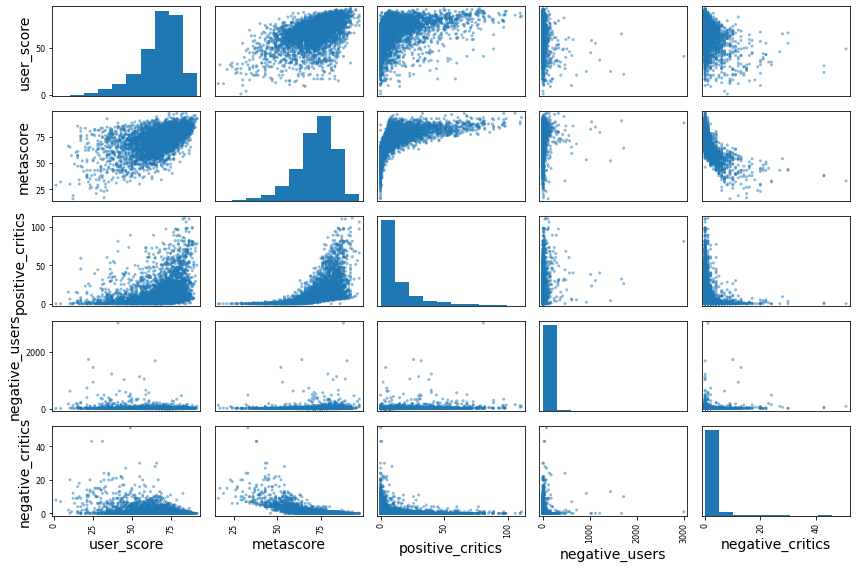

In [32]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["user_score", "metascore", "positive_critics",
              "negative_users","negative_critics"]
scatter_matrix(videogames[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Our analysis shows that the most promising attribute to predict the user score value is the metascore, so let’s zoom in on their correlation scatterplot:

Saving figure metascore_vs_user_score_scatterplot


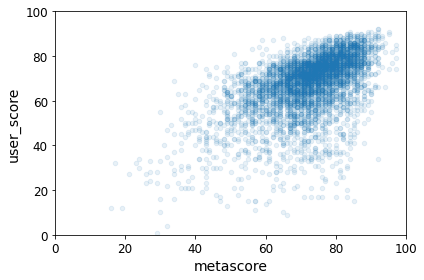

In [33]:
videogames.plot(kind="scatter", x="metascore", y="user_score",
             alpha=0.1)
plt.axis([0, 100, 0, 100])
save_fig("metascore_vs_user_score_scatterplot")

The plot reveals that the correlation is indeed very strong.We can see a clear trend and more data concentration around a user score of 60-80 and a similar metascore range(The average score from all Metacritic critics).
We will proceed to some feature engineering by adding the variable year of release based on the date.


In [34]:
videogames['Release_Year'] = videogames['release_date'].str[-4:]
#change the data type of year to numerical
videogames['Release_Year']= pd.to_numeric(videogames['Release_Year'])

Additionally, the total count of critics per game might be an interesting predictor of user score:

In [35]:
videogames['critics_total'] = videogames['positive_critics']+videogames['neutral_critics']+videogames['negative_critics']


In [36]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 2727 to 4748
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game              4559 non-null   object
 1   platform          4559 non-null   object
 2   developer         4546 non-null   object
 3   genre             4559 non-null   object
 4   number_players    2443 non-null   object
 5   rating            3536 non-null   object
 6   release_date      4559 non-null   object
 7   positive_critics  4559 non-null   int64 
 8   neutral_critics   4559 non-null   int64 
 9   negative_critics  4559 non-null   int64 
 10  positive_users    4559 non-null   int64 
 11  neutral_users     4559 non-null   int64 
 12  negative_users    4559 non-null   int64 
 13  metascore         4559 non-null   int64 
 14  user_score        4559 non-null   int64 
 15  total_critics     4559 non-null   int64 
 16  total_users       4559 non-null   int64 
 17  Release_Yea

I will rerun a correlation matrix to see if the year and/or the total number of critics is a great potential predictor of user score: 

In [37]:
corr_matrix = videogames.corr()
corr_matrix["user_score"].sort_values(ascending=False)


user_score          1.000000
metascore           0.538901
positive_critics    0.333972
total_critics       0.168186
critics_total       0.168186
positive_users      0.128067
total_users        -0.012383
neutral_users      -0.021576
Release_Year       -0.062040
neutral_critics    -0.158462
negative_users     -0.182704
negative_critics   -0.385940
Name: user_score, dtype: float64

We can see that the release year is weakly correlated the user score. Moreover, the total number of critics is more correlated than the critics counted seperately except for the positive critics that have a high correlation.

# Prepare the data for Machine Learning algorithms

We can now prepare the data for our machine learning algorithm. 

In [85]:
videogames = strat_train_set
#videogames = strat_train_set.drop("user_score", axis=1) # drop labels for training set
#videogames_labels = strat_train_set["user_score"].copy()
#I am adding the critics total based on my previous analysis
videogames['critics_total'] = videogames['positive_critics']+videogames['neutral_critics']+videogames['negative_critics']
videogames['Release_Year'] = videogames['release_date'].str[-4:]
videogames['Release_Year']= pd.to_numeric(videogames['Release_Year'])
videogames = videogames.drop("release_date", axis = 1)#we drop the date column since we have the year now 

videogames

,game,platform,developer,genre,number_players,rating,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,critics_total,Release_Year
2727,Rhythm Heaven Megamix,3DS,Nintendo,Action,NaN,E,32,5,0,10,3,1,83,83,37,2016
186,Harvest Moon 3D: The Tale of Two Towns,3DS,Marvelous Entertainment,Strategy,NaN,E,2,12,0,5,1,5,63,64,14,2011
5695,Fimbul,PS4,Zaxis,Action Adventure,No Online Multiplayer,NaN,0,7,2,1,0,0,52,18,9,2019
3502,Bus Simulator 16,PC,Still Alive Studios,Simulation,NaN,NaN,0,4,4,1,2,2,46,60,8,2016
461,The Sims 3 Seasons,PC,The Sims Studio,Simulation,NaN,T,8,4,0,4,0,0,73,75,12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,Danger Zone 2,PS4,Three Fields Entertainment,Racing,No Online Multiplayer,E10+,5,12,0,1,2,0,68,41,17,2018
3749,The Elder Scrolls: Legends,PC,"Bethesda Softworks, Dire Wolf Digital",Miscellaneous,Online Multiplayer,NaN,15,2,0,10,8,14,80,57,17,2017
5562,Unruly Heroes,PC,Magic Design Studios,Action,Online Multiplayer,NaN,8,1,0,2,1,0,82,61,9,2019
390,Deadlight,PC,Tequila Works,Action,NaN,M,5,2,0,34,50,26,78,74,7,2012


In [86]:
sample_incomplete_rows = videogames[videogames.isnull().any(axis=1)].count()
sample_incomplete_rows = videogames[videogames.isnull().any(axis=1)].head()
sample_incomplete_rows

,game,platform,developer,genre,number_players,rating,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,critics_total,Release_Year
2727,Rhythm Heaven Megamix,3DS,Nintendo,Action,NaN,E,32,5,0,10,3,1,83,83,37,2016
186,Harvest Moon 3D: The Tale of Two Towns,3DS,Marvelous Entertainment,Strategy,NaN,E,2,12,0,5,1,5,63,64,14,2011
5695,Fimbul,PS4,Zaxis,Action Adventure,No Online Multiplayer,NaN,0,7,2,1,0,0,52,18,9,2019
3502,Bus Simulator 16,PC,Still Alive Studios,Simulation,NaN,NaN,0,4,4,1,2,2,46,60,8,2016
461,The Sims 3 Seasons,PC,The Sims Studio,Simulation,NaN,T,8,4,0,4,0,0,73,75,12,2012


We are now going through data preprocessing. It would be goo to start by taking care of the NA values. There are many rows countaining NA values (more than 2K), therefore we need to proceed strategically. We will first remove the number of players  and the ratings column that contains a lot of NA values (see table below):

In [87]:
videogames.isna().sum()

game                   0
platform               0
developer             13
genre                  5
number_players      2116
rating              1023
positive_critics       0
neutral_critics        0
negative_critics       0
positive_users         0
neutral_users          0
negative_users         0
metascore              0
user_score             0
critics_total          0
Release_Year           0
dtype: int64

In [88]:
videogames = videogames.drop("number_players", axis = 1)#we drop the column number_players 
videogames = videogames.drop("rating", axis = 1)#we drop the column rating

In [89]:
videogames.isna().sum()

game                 0
platform             0
developer           13
genre                5
positive_critics     0
neutral_critics      0
negative_critics     0
positive_users       0
neutral_users        0
negative_users       0
metascore            0
user_score           0
critics_total        0
Release_Year         0
dtype: int64

To go further in our NA processing we can now remove the rows with a NA developer and NA genre because it concerns a very small portion of our data.

In [90]:
videogames = videogames.dropna(subset=["developer"])  
videogames = videogames.dropna(subset=["genre"]) 

In [91]:
videogames.isna().sum()

game                0
platform            0
developer           0
genre               0
positive_critics    0
neutral_critics     0
negative_critics    0
positive_users      0
neutral_users       0
negative_users      0
metascore           0
user_score          0
critics_total       0
Release_Year        0
dtype: int64

We can see that the NA problem is solved !

In [92]:
videogames.info() #To double check that all counts are the same!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 2727 to 4748
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game              4546 non-null   object
 1   platform          4546 non-null   object
 2   developer         4546 non-null   object
 3   genre             4546 non-null   object
 4   positive_critics  4546 non-null   int64 
 5   neutral_critics   4546 non-null   int64 
 6   negative_critics  4546 non-null   int64 
 7   positive_users    4546 non-null   int64 
 8   neutral_users     4546 non-null   int64 
 9   negative_users    4546 non-null   int64 
 10  metascore         4546 non-null   int64 
 11  user_score        4546 non-null   int64 
 12  critics_total     4546 non-null   int64 
 13  Release_Year      4546 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 532.7+ KB


In [93]:
videogames_num = videogames.select_dtypes(include=[np.int])
videogames_num

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,critics_total,Release_Year
2727,32,5,0,10,3,1,83,83,37,2016
186,2,12,0,5,1,5,63,64,14,2011
5695,0,7,2,1,0,0,52,18,9,2019
3502,0,4,4,1,2,2,46,60,8,2016
461,8,4,0,4,0,0,73,75,12,2012
...,...,...,...,...,...,...,...,...,...,...
5236,5,12,0,1,2,0,68,41,17,2018
3749,15,2,0,10,8,14,80,57,17,2017
5562,8,1,0,2,1,0,82,61,9,2019
390,5,2,0,34,50,26,78,74,7,2012


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    
    ])
y_train = videogames_num["user_score"]
X_train_num = videogames_num.drop("user_score", axis = 1)

We can now can proceed to the data preprocessing of our categorical variables. 

In [95]:
videogames_cat = videogames.select_dtypes(include=[np.object])
videogames_cat.head(10)

,game,platform,developer,genre
2727,Rhythm Heaven Megamix,3DS,Nintendo,Action
186,Harvest Moon 3D: The Tale of Two Towns,3DS,Marvelous Entertainment,Strategy
5695,Fimbul,PS4,Zaxis,Action Adventure
3502,Bus Simulator 16,PC,Still Alive Studios,Simulation
461,The Sims 3 Seasons,PC,The Sims Studio,Simulation
3068,Dragon Ball: Xenoverse 2,XONE,Dimps Corporation,Action
1917,The Vanishing of Ethan Carter,PS4,The Astronauts,Miscellaneous
886,Just Dance 2014,WIIU,Ubisoft,Action
4911,Wizard of Legend,Switch,Contingent99,Role-Playing
1706,Bound by Flame,PC,Spiders,Action RPG


From this view above we can figure that removing the game name and the release full date is common sense.

In [96]:
videogames_cat = videogames_cat.drop("game", axis = 1)#we drop the game name because it is a unique key for each row 
videogames_cat = videogames_cat.drop("developer", axis = 1)#we drop the game name because it is a unique key for each row 

videogames_cat

,platform,genre
2727,3DS,Action
186,3DS,Strategy
5695,PS4,Action Adventure
3502,PC,Simulation
461,PC,Simulation
...,...,...
5236,PS4,Racing
3749,PC,Miscellaneous
5562,PC,Action
390,PC,Action


In [97]:
videogames2 = pd.concat([X_train_num, videogames_cat], axis = 1)
videogames2

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,critics_total,Release_Year,platform,genre
2727,32,5,0,10,3,1,83,37,2016,3DS,Action
186,2,12,0,5,1,5,63,14,2011,3DS,Strategy
5695,0,7,2,1,0,0,52,9,2019,PS4,Action Adventure
3502,0,4,4,1,2,2,46,8,2016,PC,Simulation
461,8,4,0,4,0,0,73,12,2012,PC,Simulation
...,...,...,...,...,...,...,...,...,...,...,...
5236,5,12,0,1,2,0,68,17,2018,PS4,Racing
3749,15,2,0,10,8,14,80,17,2017,PC,Miscellaneous
5562,8,1,0,2,1,0,82,9,2019,PC,Action
390,5,2,0,34,50,26,78,7,2012,PC,Action


It is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).Now that we have our training set ready for modelling we just need to standard scale since our features have different scales. But first, we will seperate the predictors and dependant variable.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train_num)
cat_attribs = list(videogames_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

videogames_prepared = full_pipeline.fit_transform(videogames2)
videogames_prepared 

In [100]:
videogames_prepared.shape

(4546, 66)

# Select and train a model 

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(videogames_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
lin_reg.coef_

array([  0.48382173,   0.31051059,  -0.85928109,   1.90312611,
        -1.32844971,  -2.97487117,   6.33492671,   0.42833432,
        -1.5403052 ,   1.18740377,  -1.80770314,  -3.98576944,
         3.93970065,   2.62706631,   2.16379814,  -4.12449629,
         6.86487845,  18.62618754,  -0.23097388,   1.4300084 ,
        -0.85587745,   1.45017626,  10.04200082, -23.52153231,
        11.75147723,   4.98594629,  -6.44834633,  11.03168119,
        -3.44848833,   8.08914629,   3.19599684,  -7.52625851,
        -0.2086505 ,  -8.64279961,  -4.56203752,   0.99432755,
        -0.11412171,   3.93618091,   1.78435861,   2.09671989,
         0.63340487,   5.01881883,   1.25318633,   0.65341741,
         3.09140675,  -3.42823258,   4.36383311,  -3.26163012,
         0.41185511,  -0.96939864,   1.576224  ,   2.7104071 ,
         1.76449778,   1.81507618,   4.73986154, -12.46937882,
        -1.50450373,  -8.1517901 ,   0.36115998,   7.10788304,
        -5.07896677,  -4.86965154,   3.12300736, -14.28

In [103]:
# let's try the full preprocessing pipeline on a few training instances
some_data = videogames2.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:",lin_reg.predict(some_data_prepared))


Predictions: [77.0442387  68.56369782 51.51040488 48.60280939 68.71502558]


Compare against the actual values:

In [104]:
print("Labels:", list(some_labels))

Labels: [83, 64, 18, 60, 75]


We can see here that our predictions are not too bad, let's gain more insight with the mean squared error...

In [105]:
from sklearn.metrics import mean_squared_error

videogames_predictions = lin_reg.predict(videogames_prepared)
lin_mse = mean_squared_error(y_train, videogames_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.123967468275863

In [106]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, videogames_predictions)
lin_mae

7.3910532160256395

In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(videogames_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [108]:
videogames_predictions = tree_reg.predict(videogames_prepared)
tree_mse = mean_squared_error(y_train, videogames_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.29364885908463356

# Fine-tune your model

In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, videogames_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [110]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [10.67615192 10.96818576 11.64672288 11.31613649 10.74284838 12.44336621
 11.10720685 12.27995753 11.44610047 11.09192666]
Mean: 11.371860313622756
Standard deviation: 0.5699083476825663


In [111]:
lin_scores = cross_val_score(lin_reg, videogames_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [10.0954325  10.1762419  10.28820139 10.62130533 10.09542474 10.44922959
 10.24292868 11.31099401  9.85942471  9.85170024]
Mean: 10.299088309432602
Standard deviation: 0.4055980431560788


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [112]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(videogames_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [113]:
videogames_predictions = forest_reg.predict(videogames_prepared)
forest_mse = mean_squared_error(y_train, videogames_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.996606367877912

In [114]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, videogames_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [7.83460131 8.01779269 8.69045448 8.4895772  7.53319202 8.36923968
 7.71572986 8.36794366 7.99482614 7.84062077]
Mean: 8.085397780801795
Standard deviation: 0.3559532158389682


In [115]:
scores = cross_val_score(lin_reg, videogames_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     10.299088
std       0.427538
min       9.851700
25%      10.095427
50%      10.209585
75%      10.408973
max      11.310994
dtype: float64

In [116]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(videogames_prepared, y_train)
videogames_predictions = svm_reg.predict(videogames_prepared)
svm_mse = mean_squared_error(y_train, videogames_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

10.601842971111333

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(videogames_prepared, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found:

In [118]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [119]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [120]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

11.122282231482764 {'max_features': 2, 'n_estimators': 3}
9.82626400062998 {'max_features': 2, 'n_estimators': 10}
9.533484045784233 {'max_features': 2, 'n_estimators': 30}
10.72057424158685 {'max_features': 4, 'n_estimators': 3}
9.553921287787547 {'max_features': 4, 'n_estimators': 10}
9.263842495864061 {'max_features': 4, 'n_estimators': 30}
10.600275375081953 {'max_features': 6, 'n_estimators': 3}
9.48408505467513 {'max_features': 6, 'n_estimators': 10}
9.156213291498137 {'max_features': 6, 'n_estimators': 30}
10.620688267564162 {'max_features': 8, 'n_estimators': 3}
9.376572685493663 {'max_features': 8, 'n_estimators': 10}
8.96062660313227 {'max_features': 8, 'n_estimators': 30}
11.039194480267774 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
9.880585188621115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
10.909492799083667 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
9.729843565132759 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [121]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.090753,0.014976,0.005335,0.005956,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-114.606444,-128.526749,...,-123.705162,5.420643,18,-34.231013,-30.182137,-31.994379,-32.517765,-34.680292,-32.721117,1.620745
1,0.271496,0.041592,0.007245,0.001657,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-92.419910,-101.711782,...,-96.555464,3.127359,10,-19.051725,-17.881322,-17.723277,-18.149813,-18.063992,-18.174026,0.463012
2,0.941163,0.243682,0.020377,0.007142,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-87.148130,-96.220801,...,-90.887318,3.134502,7,-14.539782,-14.003599,-13.785135,-14.624328,-14.169215,-14.224412,0.317541
3,0.086815,0.020742,0.003903,0.002436,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-115.941422,-124.074319,...,-114.930712,5.869590,14,-30.301005,-29.857331,-30.605254,-31.185990,-29.974002,-30.384716,0.478436
4,0.412923,0.040553,0.010379,0.005380,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-85.502904,-98.978295,...,-91.277412,5.246681,8,-17.588378,-16.541364,-17.050038,-17.055926,-16.750928,-16.997327,0.353318
5,0.713372,0.043315,0.016379,0.001973,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-82.014829,-90.979212,...,-85.818778,3.101558,3,-13.933529,-12.876564,-12.992563,-13.190553,-13.012229,-13.201088,0.379749
6,0.085473,0.007538,0.003160,0.000569,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-109.667399,-119.932112,...,-112.365838,4.038409,12,-29.195103,-28.109843,-28.466349,-27.213729,-30.149574,-28.626920,0.993133
7,0.299252,0.066859,0.013112,0.015113,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-83.044110,-101.328316,...,-89.947869,6.431829,5,-17.391753,-16.579531,-16.498167,-15.656282,-16.487446,-16.522636,0.549729
8,1.544894,0.861595,0.127067,0.198633,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-77.947058,-93.455332,...,-83.836242,5.635878,2,-13.204485,-12.424847,-13.234711,-12.752627,-12.956107,-12.914556,0.301436
9,0.098139,0.010294,0.002977,0.001299,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-108.235165,-133.809559,...,-112.799019,10.552078,13,-28.649017,-27.628448,-29.321327,-27.555831,-26.100357,-27.850996,1.095454


In [122]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(videogames_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [123]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.880408982145276 {'max_features': 7, 'n_estimators': 180}
9.441688487524598 {'max_features': 5, 'n_estimators': 15}
9.354114396720437 {'max_features': 3, 'n_estimators': 72}
9.352406879541402 {'max_features': 5, 'n_estimators': 21}
8.912633250700187 {'max_features': 7, 'n_estimators': 122}
9.353500098002495 {'max_features': 3, 'n_estimators': 75}
9.345533583499034 {'max_features': 3, 'n_estimators': 88}
9.078286212331905 {'max_features': 5, 'n_estimators': 100}
9.30309993787222 {'max_features': 3, 'n_estimators': 150}
11.877925072456309 {'max_features': 5, 'n_estimators': 2}


In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.22674451e-01, 7.02720623e-02, 7.17579559e-02, 1.09088523e-01,
       5.24077029e-02, 1.47225670e-01, 1.55303464e-01, 6.10367638e-02,
       5.35957852e-02, 5.31068359e-03, 1.10534026e-02, 1.80537308e-02,
       1.14822259e-02, 5.63849295e-03, 3.38442360e-03, 1.32740686e-02,
       7.62694801e-06, 5.22594935e-05, 1.06049228e-02, 8.68475670e-03,
       6.68866170e-04, 6.98691646e-03, 1.43598397e-04, 2.00135626e-03,
       3.61351520e-05, 3.46163990e-06, 7.19823560e-05, 1.92232963e-04,
       2.00674858e-03, 1.16282987e-05, 1.39386213e-03, 2.25860899e-04,
       8.13985346e-04, 7.38579904e-05, 1.32762279e-04, 3.18558552e-03,
       4.19809490e-04, 7.28891966e-04, 3.94983946e-05, 1.09732353e-05,
       3.63963603e-04, 2.21891118e-05, 4.19586476e-03, 1.27137760e-03,
       1.37548450e-06, 2.58264263e-06, 1.73079534e-04, 7.08382428e-06,
       1.03695678e-03, 3.28083165e-03, 2.70483266e-03, 7.33243062e-03,
       1.07227075e-03, 2.47127394e-05, 5.15057645e-04, 2.39420248e-04,
      

In [125]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.15530346448701687, 'metascore'),
 (0.14722566977953536, 'negative_users'),
 (0.12267445132237827, 'positive_critics'),
 (0.10908852324794285, 'positive_users'),
 (0.0717579559010286, 'negative_critics'),
 (0.07027206229189263, 'neutral_critics'),
 (0.06103676380029456, 'critics_total'),
 (0.0535957852029101, 'Release_Year'),
 (0.05240770290830872, 'neutral_users'),
 (0.01805373075297729, 'PS4'),
 (0.013274068577167208, 'XONE'),
 (0.011482225868166102, 'Switch'),
 (0.01105340256440321, 'PC'),
 (0.005638492954484566, 'VITA'),
 (0.005310683588754159, '3DS'),
 (0.003384423601714119, 'WIIU')]

In [126]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

We see that the best estimator model is the RandomForestRegressor, it will thus be the model we will be using to assess the predictive power of our test data. We are first doing all the data preprocessing that we have done for the training set , on the test set so the data is on a shape to be fed to the model.

In [136]:
#Preprocessing the Testing Set (repeatng steps of training set)
videogames0 = strat_test_set
videogames0['critics_total'] = videogames0['positive_critics']+videogames0['neutral_critics']+videogames0['negative_critics']
videogames0['Release_Year'] = videogames0['release_date'].str[-4:]
videogames0['Release_Year']= pd.to_numeric(videogames0['Release_Year'])
videogames0 = videogames0.drop("release_date", axis = 1)#we drop the date column since we have the year now 
videogames0 = videogames0.drop("number_players", axis = 1)#we drop the column number_players 
videogames0 = videogames0.drop("rating", axis = 1)#we drop the column rating
videogames0 = videogames0.dropna(subset=["developer"])  
videogames0 = videogames0.dropna(subset=["genre"]) 
#Drop rows where categories donotexist on train set

videogames0 = videogames0[videogames0.genre != 'Rally / Offroad']
videogames0 = videogames0[videogames0.genre != 'City Building']
videogames0 = videogames0[videogames0.genre != 'Compilation']

videogames_cat_test = videogames0.select_dtypes(include=[np.object])
videogames_cat_test = videogames_cat_test.drop("game", axis = 1)#we drop the game name
videogames_cat_test = videogames_cat_test.drop("developer", axis = 1)#we drop the game name because it is a unique key for each row 

videogames_num_test = videogames0.select_dtypes(include=[np.int])
X_test_prepared  = pd.concat([videogames_num_test, videogames_cat_test], axis = 1)
X_test  = X_test_prepared.drop("user_score",axis = 1) 
X_test

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,critics_total,Release_Year,platform,genre
39,21,3,0,40,7,3,82,24,2011,PC,Adventure
3522,0,3,14,13,6,12,35,17,2016,XONE,Action
1741,0,16,11,3,7,9,48,27,2014,PS4,Horror
1420,9,10,0,5,4,2,74,19,2014,XONE,Action
3462,1,11,3,2,0,0,54,15,2016,3DS,Role-Playing
...,...,...,...,...,...,...,...,...,...,...,...
4935,4,5,0,0,0,1,76,9,2018,Switch,Action
3843,10,3,0,4,1,0,78,13,2017,XONE,Action
633,0,2,5,4,7,10,39,7,2012,PC,Action Adventure
895,26,32,1,83,108,128,72,59,2013,PC,Action Adventure


In [137]:
y_test = videogames_num_test["user_score"].copy()

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared 

<1136x66 sparse matrix of type '<class 'numpy.float64'>'
	with 12496 stored elements in Compressed Sparse Row format>

In [140]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [141]:
final_rmse

8.675631526885569

We can compute a 95% confidence interval for the test RMSE:

In [142]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([8.10710634, 9.20912545])

We could compute the interval manually like this:

In [143]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(8.107106344179035, 9.209125447335031)

Alternatively, we could use a z-scores rather than t-scores:

In [144]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(8.107733842036083, 9.208573001680794)

# Extra material

## A full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(videogames2, y_train)
full_pipeline_with_predictor.predict(some_data)

In [3]:
!jupyter nbconvert  Individual Assignment1.ipynb --to html

[NbConvertApp] WARNING | pattern 'Individual' matched no files
[NbConvertApp] WARNING | pattern 'Assignment1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default ba